In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report


In [28]:
# Load your dataset
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork 03102025/student_data.csv')


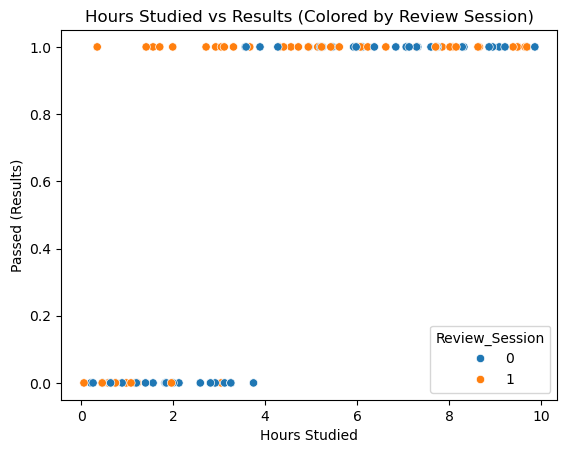

In [30]:
# Step 2: Visualize data
sns.scatterplot(data=data, x='Hours_Studied', y='Results', hue='Review_Session')
plt.title('Hours Studied vs Results (Colored by Review Session)')
plt.xlabel('Hours Studied')
plt.ylabel('Passed (Results)')
plt.show()

In [32]:
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

In [9]:
# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Output coefficients
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Coefficients: {list(zip(X.columns, log_reg.coef_[0]))}")

Intercept: -4.6137
Coefficients: [('Hours_Studied', 1.3654201630319378), ('Review_Session', 1.8779759145535337)]


In [11]:
# Predictions and evaluation
y_pred = log_reg.predict(X)
y_prob = log_reg.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy: 0.9300
AUC Score: 0.9761


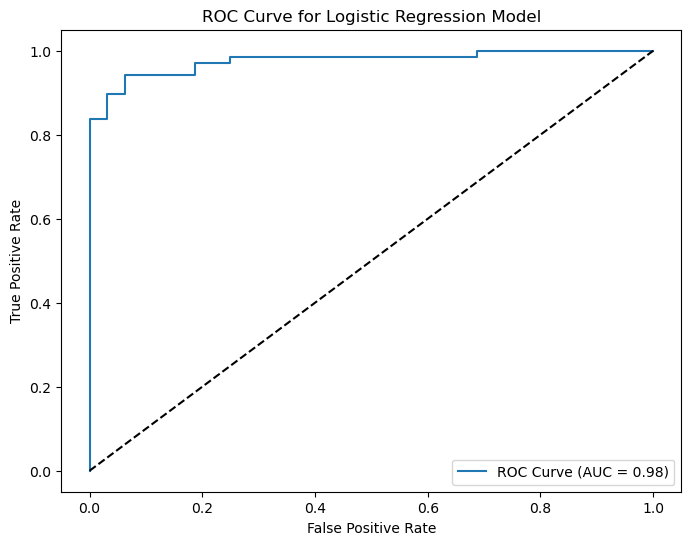

In [34]:

# ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.show()

In [15]:
# Classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

